In [1]:
import pickle
from cosinorage.dataloaders import DataLoader

## Raw Accelerometer Data obtained from Smartwatch

In [2]:
reload_smartwatch = True

In [3]:
if reload_smartwatch:
    smartwatch_loader = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=True)
    smartwatch_loader.load_data(verbose=True, autocalib_tol=10e-10)
    with open("smartwatch_loader.pkl", "wb") as file:
        pickle.dump(smartwatch_loader, file)
else:
    with open("smartwatch_loader.pkl", "rb") as file:
        smartwatch_loader = pickle.load(file)

Loading CSV files: 100%|██████████| 145/145 [00:13<00:00, 10.69it/s]


Loaded 41760000 accelerometer data records from ../data/62164/
The frequency of the accelerometer data is 80.0Hz
Filtered out 7200000 accelerometer records due to incomplete daily coverage


Calibrating:  44%|████▍     | 444/1000 [07:12<09:01,  1.03iter/s]


Convergence reached at iteration 445
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Preprocessed accelerometer data
Calculated ENMO for 34560000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records


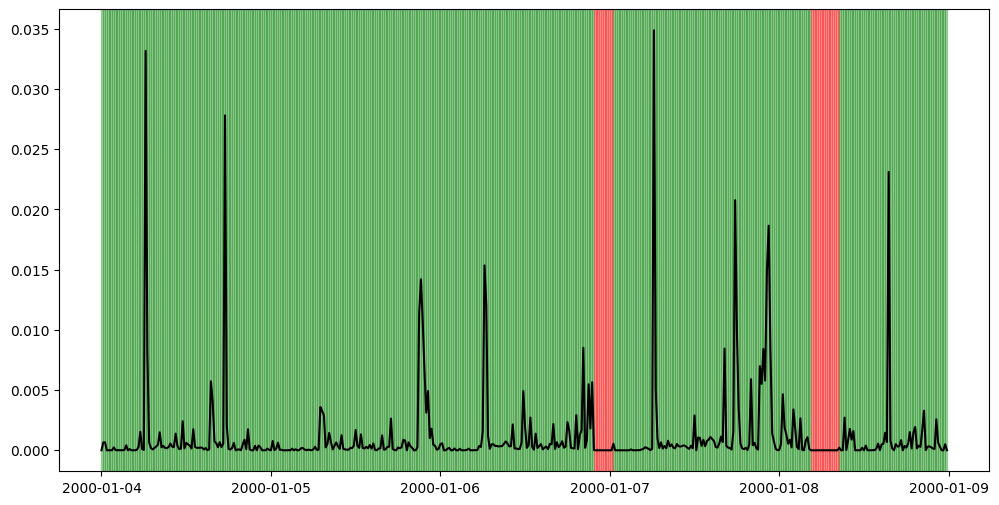

In [4]:
smartwatch_loader.plot_orig_enmo()

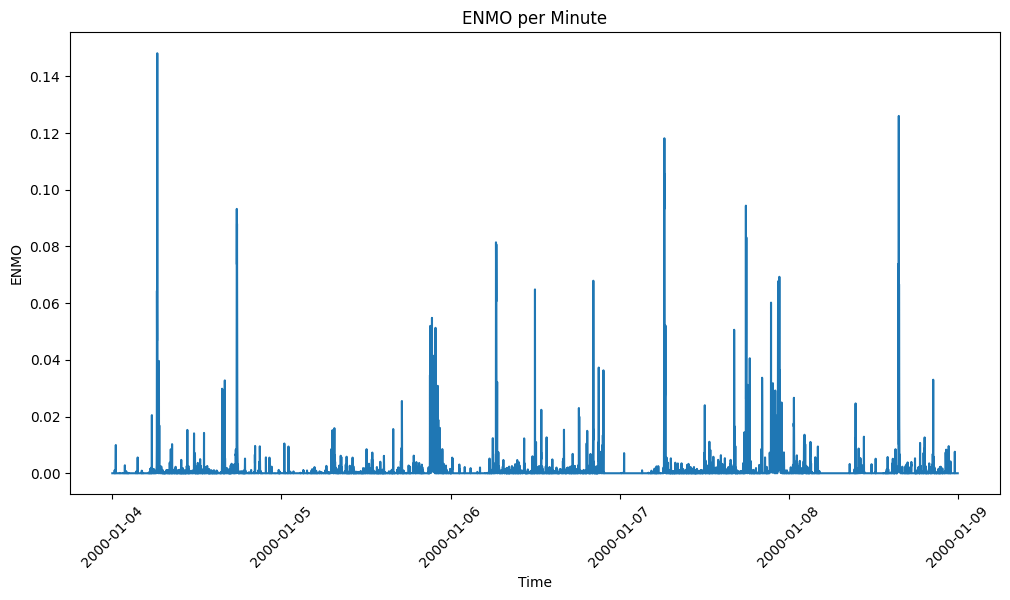

In [5]:
smartwatch_loader.plot_enmo()

## ENMO Data obtained from UK-Biobank

In [6]:
reload_biobank = True

In [7]:
if reload_biobank:
    biobank_loader = DataLoader(datasource='uk-biobank', input_path='../data/62164.csv', preprocess=True)
    biobank_loader.load_data(verbose=True)
    with open("loader_biobank.pkl", "wb") as file:
        pickle.dump(biobank_loader, file)
else:
    with open("loader_biobank.pkl", "rb") as file:
        biobank_loader = pickle.load(file)

Loaded 10080 minute-level ENMO records from ../data/62164.csv
Filtered out 0 minute-level ENMO records due to incomplete daily coverage


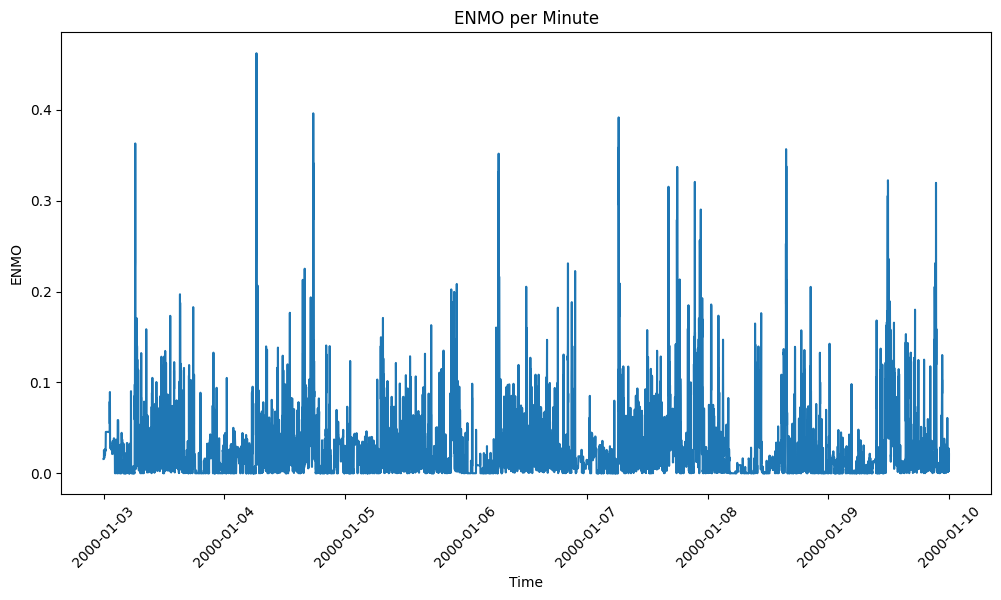

In [8]:
biobank_loader.plot_enmo()